### Accessible Learning Analytics

### Import packages

In [1]:
# #Unhide if you run the code from Google Colab (Select all line beloe, then (Ctrl + /))

# !pip install graphviz
# !apt-get install graphviz


In [2]:

import io
import numpy as np
import pandas as pd
import datetime
import re 
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

import graphviz 



## Variables


In [3]:
#@title Variables

# Lecture Names
#InstructorNames    =  ['','']

#@markdown Semester Start Date:
StartDate = '2017-09-10' #@param {type:"date"}
StartDate = pd.to_datetime(StartDate)

#@markdown Semester End Date:
EndDate = '2018-01-15' #@param {type:"date"}
EndDate = pd.to_datetime(EndDate)

# Course Start Date ex: '2017-08-01'
# StartDate = pd.to_datetime('2017-09-01')

# Course End Date ex: '2017-08-01'
# EndDate   = pd.to_datetime('2018-01-20')

#@markdown Grade A Start From:
A_Start   = 75 #@param {type:"number"}

#@markdown Grade B Start From:
B_Start   = 45 #@param {type:"number"}

#@markdown Final grade Column name in Grades file:
FGradeCol = "Course total (Real)" #@param {type:"string"}


#@markdown Student name in Grade file:
StdCol    = 'User full name' #@param {type:"string"}


#@markdown Student Activity File Name  
#@markdown -- Select from list or Type
ActivityFile = './Data/GG - ADS/MoodleLogs.csv' #@param ["Y4-DA_Activity_Obfuscated.csv"  , "BI_Activity_Obfuscated.csv" ,  "ADS_Activity_Obfuscated.csv","a1.csv","Y1_Semester2_Sdev_Activity_Obfuscated.csv"] {allow-input: true}



#@markdown Student Grades File Name
#@markdown -- Select from list or Type
GradeFile    = './Data/GG - ADS/MoodleGrades.csv' #@param ["Y4-DA-Final_Grade_Obfuscated.csv", "BI_Grade_Obfuscated.csv" , "ADS_Grade_Obfuscated.csv","Y1_Semester1_Sdev__Full_Results_Obfuscated.csv","Y1_Semester2_Sdev_Full_Results_Obfuscated.csv"] {allow-input: true}

    
#@markdown Student Grades File Name
#@markdown -- Please use the semicolon **";"** as your separator between names.

InstructorNames= "" #@param {type:"string"}
InstructorNames= pd.Series(InstructorNames).str.split(";")


### Import Data

**Import activity load:**

In [4]:
# Load the activity file
Activity = pd.read_csv(ActivityFile,encoding = "latin-1",low_memory = False)

Activity.head(20)

,Time,User full name,Affected user,Event context,Component,Event name,Description,IP address,Origin
0,"28 Feb, 20:17",B77,-,Course: ADSA H6013 - Algorithms for Data Science,System,Course viewed,The user with id '13485' viewed the course wit...,10.30.0.20,web
1,"14 Feb, 18:31",B77,-,Course: ADSA H6013 - Algorithms for Data Science,System,Course viewed,The user with id '13485' viewed the course wit...,10.30.0.20,web
2,"14 Feb, 18:30",B77,-,Course: ADSA H6013 - Algorithms for Data Science,Overview report,Grade overview report viewed,The user with id '13485' viewed the overview r...,10.30.0.20,web
3,"14 Feb, 18:29",B77,-,Course: ADSA H6013 - Algorithms for Data Science,User report,Grade user report viewed,The user with id '13485' viewed the user repor...,10.30.0.20,web
4,"14 Feb, 18:29",B77,-,Course: ADSA H6013 - Algorithms for Data Science,System,Course viewed,The user with id '13485' viewed the course wit...,10.30.0.20,web
5,"5 Feb, 22:14",B77,-,Course: ADSA H6013 - Algorithms for Data Science,User report,Grade user report viewed,The user with id '13485' viewed the user repor...,10.30.0.20,web
6,"5 Feb, 22:14",B77,-,Course: ADSA H6013 - Algorithms for Data Science,System,Course viewed,The user with id '13485' viewed the course wit...,10.30.0.20,web
7,"31 Jan, 18:01",B77,-,Course: ADSA H6013 - Algorithms for Data Science,System,Course viewed,The user with id '13485' viewed the course wit...,10.30.0.20,web
8,"25 Jan, 14:10",B77,-,Turnitin Assignment 2: Upload classification p...,Turnitin Assignment 2,List Submissions,User viewed their submission inbox at course: 264,10.30.0.20,web
9,"25 Jan, 14:10",B77,-,Course: ADSA H6013 - Algorithms for Data Science,System,Course viewed,The user with id '13485' viewed the course wit...,10.30.0.20,web


**Let's see what the data set contains:**

In [5]:
# Number of records in the activity log.
len(Activity)

14811

In [6]:
# Generates descriptive statistics
Activity.describe().transpose()

,count,unique,top,freq
Time,14811,8779,"19 Sep, 09:24",19
User full name,14811,37,B59,1529
Affected user,14811,1,-,14811
Event context,14811,150,Course: ADSA H6013 - Algorithms for Data Science,6104
Component,14811,9,System,5747
Event name,14811,13,Course module viewed,7151
Description,14811,3283,User viewed their submission inbox at course: 264,1222
IP address,14811,330,10.30.0.20,8840
Origin,14811,1,web,14811


Attribute Information: 


*   **Affected user:** It contains the name of the user if the action is related to them.
*  **Time:** It contains the date, month and time stamp of the log entry when it was recorded. (Year infomration may or may not be included)
*  **User full name:** Name of the user is listed in this column.
*  **Event context:** It displays the name of the activity or resource. Ex: Lecture 4, Lab2 Upload
*  **Component:** It displays the type of the activity or resource. Ex: File, System, Assignment, Quiz ...
*  **Event name:** It displays the event name in relation to users' action. There are four actions that a user can do in Moodle - Create, View, Update and Delete.
*  **Description:** It contains descriptive information about the action performed by the user.
*  **IP address:** Shows the IP address of the user.
*  **Origin:** It indicates whether the user performed an action using a desktop/laptop or mobile. Any user activity from a mobile device will be recorded as 'ws'.

Reference: https://moodle.info.yorku.ca/instructor_resources/instructors/training/logs/#squelch-taas-toggle-shortcode-content-0






In [7]:
# Load the grade file

Grades = pd.read_csv(GradeFile,encoding = "latin-1",low_memory = False)



In [8]:
# Number of records in the grade file

len(Grades)

37

In [9]:
# Generates descriptive statistics

Grades.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Paper Week7,37.0,14.943243,9.402557,0.0,9.0,17.0,23.4,28.5
Paper Week10,37.0,15.313514,9.878039,0.0,9.0,18.1,23.0,29.0
Self evaluation Week10,37.0,2.859459,1.788460,0.0,1.8,2.5,4.5,5.0
Presentation Week 12,37.0,3.081081,1.951614,0.0,0.0,3.9,4.7,5.0
Practical Week 15,37.0,14.908108,10.185048,0.0,2.0,19.1,23.4,28.6
Course total (Real),37.0,51.137838,30.218504,0.0,30.0,61.9,77.3,90.8


# Load Functions Notebook

In [10]:
%run functions.ipynb

## Clean Data

In [11]:
# Remove columns with only one value 

Grades = Grades[[c for c
                     in list(Grades)
                     if len(Grades[c].unique()) > 1]]  


Grades.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Paper Week7,37.0,14.943243,9.402557,0.0,9.0,17.0,23.4,28.5
Paper Week10,37.0,15.313514,9.878039,0.0,9.0,18.1,23.0,29.0
Self evaluation Week10,37.0,2.859459,1.788460,0.0,1.8,2.5,4.5,5.0
Presentation Week 12,37.0,3.081081,1.951614,0.0,0.0,3.9,4.7,5.0
Practical Week 15,37.0,14.908108,10.185048,0.0,2.0,19.1,23.4,28.6
Course total (Real),37.0,51.137838,30.218504,0.0,30.0,61.9,77.3,90.8


In [12]:
# Remove columns with only one value 

Activity = Activity[[c for c
                     in list(Activity)
                     if len(Activity[c].unique()) > 1]]  


Activity.describe().transpose()

,count,unique,top,freq
Time,14811,8779,"19 Sep, 09:24",19
User full name,14811,37,B59,1529
Event context,14811,150,Course: ADSA H6013 - Algorithms for Data Science,6104
Component,14811,9,System,5747
Event name,14811,13,Course module viewed,7151
Description,14811,3283,User viewed their submission inbox at course: 264,1222
IP address,14811,330,10.30.0.20,8840


In [13]:
# Remove all rows with instructor name in the InstructorNames list

originalLength = len(Activity)

Activity = Activity[~Activity['User full name'].isin(InstructorNames)]

print ("Current length: " + str(len(Activity)) + " ... " + str(originalLength - len(Activity)) + " Rows Deleted.")



Current length: 14811 ... 0 Rows Deleted.


### Fix Time Column

1.   Assign DataTime data type to Time column (if not)

2.   Add the year value (if not)


In [14]:
fixTimeColumn()

,Data Type
Time,datetime64[ns]
User full name,object
Event context,object
Component,object
Event name,object
Description,object
IP address,object


### Remove activity outside semester start and end dates range

In [15]:
mask = (Activity['Time'] >= StartDate) & (Activity['Time'] <= EndDate)

Activity = Activity.loc[mask]

len(Activity)

13926

# **What we have in this course log file:**

 **Or Check Activity Patterns and Combinations:**



- How? 
Hide changing values in the Description column to get all unique pattern of activity in your log.

In [16]:
# Coud takes few minutes depends on the course log size.
findPattern(  ) 

0
Component             Event name                         Pattern_Description                                     
File                  Course module viewed               The user with  '#' viewed the 'resource' activi...  4359
Folder                Course module viewed               The user with  '#' viewed the 'folder' activity...   745
Forum                 Course module instance list viewed The user with  '#' viewed the instance list for...    17
                      Course module viewed               The user with  '#' viewed the 'forum' activity ...    14
Overview report       Grade overview report viewed       The user with  '#' viewed the overview report i...    28
Page                  Course module viewed               The user with  '#' viewed the 'page' activity w...  1297
System                Course module instance list viewed The user with  '#' viewed the list of resources...    22
                      Course user report viewed          The user with  '#' viewed the user report for t...    33
                      Course viewed                      The user with  '#' viewed the course with  '#'.     5095
                      Role assigned                      The user with  '#' assigned the role with  '#' ...     2
                      User enrolled in course            The user with  '#' enrolled the user with  '#' ...     2
                      User graded                        The user with  '#' updated the grade with  '#' ...    24
                      User list viewed                   The user with  '#' viewed the list of users in ...    44
                      User profile viewed                The user with  '#' viewed the profile for the u...    47
Turnitin Assignment 2 Add Submission                     User added  '#'                                      183
                                                         User resubmission sent to  '#'                        67
                                                         User submission sent to  '#'                          84
                      List Submissions                   User viewed their submission inbox at course: 264   1080
URL                   Course module viewed               The user with  '#' viewed the 'url' activity wi...   582
User report           Grade user report viewed           The user with  '#' viewed the user report in th...   201

- Remove admin activities

In [17]:
# List of Event Name belong to admin
toBeRemovedList = ['User graded','User profile viewed','Quiz attempt viewed','Quiz attempt summary viewed','Quiz attempt reviewed']

beforeLength = len(Activity)

Activity = Activity[~Activity['Event name'].isin(toBeRemovedList)]

print ("Current length: " + str(len(Activity)) + " ... " + str(beforeLength - len(Activity)) + " Rows Deleted.")

Current length: 13855 ... 71 Rows Deleted.


---

# Resource usage Analysis

Show the **Top** 5 most used resource for each component 

In [18]:
# Use getCounts function  to get the n most used resources per resource category
# Ex. getCounts(Activity, 5)
getCounts(Activity, 10,'T') 

count
Component Event context                                            
File      Other                                                 751
          File: Theoretical Assessment Work (2 papers)          205
          File: Practical assessment work                       157
          File: Lecture 1: Module introduction                  114
          File: Template for practical report (self evalu...    113
          File: Introductory Tutorial on RapidMiner             102
          File: Lect 7 and 8 Clustering                          98
          File: labsheet #1-gettingStartedwithRMiner             94
          File: Statistics for data mining                       83
          File: Lecture 1: CRISP-DM methodology                  76
Folder    Folder: Datasets                                      140
          Folder: Papers from past students                     101
          Folder: RM processes for labsheet1                     99
          Folder: Lab6 processes and dataset                     89
          Folder: Lab sheet 3 -  files                           81
          Folder: Illustration of over fitting and pruning       64
          Folder: RM process and datasets - lab 7                60
          Folder: Case studies                                   54
          Folder: Latex template for papers, self evaulat...     53
          Folder: Lab 2 processes                                 4
Forum     Forum: News forum                                      14
Page      Page: 2017 - recordings on clustering                 258
          Page: Oct 3rd 2017, Evaluation and Decision Trees     163
          Page: 2017 Recordings: Classification, and gett...    161
          Page: 2017 recordings, Oct 10th                       139
          Page: 2017 - Lecture 1: Introduction and CRISP-DM     134
          Page: Oct 17th: past papers, ensembles and regr...    122
          Page: 2017: Regression, SVM and intro to NN            93
          Page: 2017 recordings Clustering &amp; Associat...     84
          Page: Papers on clustering and related topics          61
          Page: more classification papers                       39
URL       URL: Recording for practical assessment (2017)        121
          URL: A selection of papers and resources on dat...     80
          URL: 2016 - Lecture 1 - Introduction and CRISP-DM      68
          URL: Presentation recordings from a previous year      63
          URL: Collection of papers on C5.0                      45
          URL: Rapidminer.com - getting started                  44
          URL: Oct 3rd, 2017, Evaluation - lecture 2.3           43
          URL: 2017: Finish Neural Networks &amp; Deep Le...     32
          URL: Minimise relative error rather than actual...     27
          URL: 2016, Sept 28th: Lecture 2 Classification         10

Show the **Least** 5 used resources for each component 



In [19]:
getCounts(Activity, 5,'L')

count
Component Event context                                            
File      File: 1996EsterEtAl Original proposers of DBScan        1
          File: Repeat and deferral instructions 2016-17          2
          File: MSWord template for papers, including sel...      4
          File: labsheet2 - evaluating classifiers                5
          File: Shim 2012 Bibliography for MapReduce Algo...      6
Folder    Folder: Lab 2 processes                                 4
          Folder: Latex template for papers, self evaulat...     53
          Folder: Case studies                                   54
          Folder: RM process and datasets - lab 7                60
          Folder: Illustration of over fitting and pruning       64
Forum     Forum: News forum                                      14
Page      Page: 2016 clustering lecture 2                         2
          Page: Lecture recordings Oct 14th 2015, and 2016        3
          Page: 2016 recordings, Oct 6th: Decision Trees ...      6
          Page: 2016 Nov 24th Association Analysis               11
          Page: Papers on Association Rule mining                21
URL       URL: 2016 recording - Oct 6th- Decision Trees           3
          URL: 2016-clustering lecture 1 (up to SOM)              4
          URL: Guest lecture: IBMs perspective on Big Dat...      4
          URL: Guest lecture: Radoop - Rapidminer for Hadoop      4
          URL: 2016 Dec: Practical Assessment and Big Data        8

---

# Number of resource viewed
The number of resources (File, Folder, Forum, Page, URL) viewed by each student 

In [20]:
StudentResourceView = resourceView()
StudentResourceView.head(10)

,User full name,lms_RescourceViewCount
0,B04,50
1,B11,46
2,B15,72
3,B18,85
4,B24,40
5,B25,84
6,B26,84
7,B30,98
8,B31,55
9,B32,15


In [21]:
    ViewData = Activity.loc[Activity['Event name'].isin(['Course module viewed'])]

    SummaryR = pd.DataFrame({'count' :ViewData.groupby(['Event context', 'User full name']).size()}).reset_index()

    SummaryR.sort_values(['Event context','count','User full name'])

    counter = pd.DataFrame( {'lms_RescourceViewCount' : SummaryR.groupby(['User full name']).size()}).reset_index()

    counter.rename(columns={'User full name': StdCol}, inplace=True)
    
    counter

,User full name,lms_RescourceViewCount
0,B04,50
1,B11,46
2,B15,72
3,B18,85
4,B24,40
5,B25,84
6,B26,84
7,B30,98
8,B31,55
9,B32,15


# Consistency 

In [22]:
WeeklyConsistency = WeeklyConsistency()

WeeklyConsistency.head(10)

,User full name,lms_ActiveWeekCount
0,B04,15
1,B11,8
2,B15,18
3,B18,18
4,B24,17
5,B25,15
6,B26,17
7,B30,16
8,B31,16
9,B32,8



---


# User Active Days Count
How many unique days did the student interact with course page?

In [23]:
ActiveDaysCount = accessDaysCount()
# Display a sample
ActiveDaysCount.head(10)

,User full name,lms_ActiveDaysCount
0,B04,28
1,B11,18
2,B15,81
3,B18,72
4,B24,48
5,B25,45
6,B26,53
7,B30,36
8,B31,37
9,B32,11


---

# Access Duration: Time between first and last activity
Number of days between the first and last activity recorded for each student.  

In [24]:
AccessDuration = firstlastGap()
# Display a sample
AccessDuration.head(10)

,User full name,lms_AccessDuration
0,B04,114
1,B11,79
2,B15,116
3,B18,120
4,B24,113
5,B25,110
6,B26,120
7,B30,117
8,B31,109
9,B32,55


---

# Longest period of inactivity
Maximum time (in sec.) without any activity during the course

In [25]:
LInactivityPeriod =  maxGap() 
LInactivityPeriod['lms_LInactivityPeriod']=LInactivityPeriod['lms_LInactivityPeriod']/60
LInactivityPeriod.head(10)

,User full name,lms_LInactivityPeriod
0,B04,17901.0
1,B11,60475.0
2,B15,11787.0
3,B18,10077.0
4,B24,12913.0
5,B25,11813.0
6,B26,11535.0
7,B30,25540.0
8,B31,15752.0
9,B32,18940.0


---

# Submission Analysis

For each assignmnet alone calculate the difference between the submissin deadline and the actual submission date.



*   Time is neglected, only date is considered.
*   The most frequent submission date for each assignment is considered here as the deadline



In [26]:
SA = SubmissionAnalysis()
# Display a Sample
SA.head(20)

#column header full assignments name

Submission deadline as calculated are:


,Event context,deadline
0,Turnitin Assignment 2: Upload classification p...,2017-11-13
1,Turnitin Assignment 2: Upload clustering paper...,2017-12-04
2,Turnitin Assignment 2: Upload practical report...,2018-01-03


------------------------------------------


,Click,lms_Assignment1_delay,lms_Assignment2_delay,lms_Assignment3_delay
User full name,,,,
B04,3,0.0,2.0,0.0
B15,3,-4.0,-3.0,-1.0
B18,3,-8.0,-2.0,-2.0
B24,1,0.0,0.0,0.0
B25,3,0.0,0.0,0.0
B26,2,0.0,0.0,0.0
B30,3,0.0,3.0,-2.0
B34,2,27.0,27.0,0.0
B35,3,16.0,3.0,0.0


# **Term-based views sum for each student per resource:**



Description for the table summary.

In [27]:
Activity['Click']= 1 

TermSummary = getTermSummary()

TermSummary.head(20)

# header FolderViewCount , ....

Component,User full name,lms_Count_File,lms_Count_Folder,lms_Count_Forum,lms_Count_Page,lms_Count_System,lms_Count_URL
0,B04,57.0,16.0,0.0,8.0,92.0,3.0
1,B11,65.0,14.0,1.0,2.0,56.0,17.0
2,B15,213.0,28.0,0.0,61.0,261.0,17.0
3,B18,182.0,23.0,0.0,49.0,192.0,21.0
4,B24,118.0,7.0,0.0,22.0,139.0,21.0
5,B25,135.0,25.0,0.0,19.0,136.0,9.0
6,B26,117.0,27.0,0.0,48.0,171.0,28.0
7,B30,104.0,11.0,1.0,14.0,65.0,8.0
8,B31,84.0,12.0,0.0,11.0,88.0,22.0
9,B32,9.0,3.0,0.0,10.0,31.0,1.0


# ***Weekly data for plot***

**Generate week based view sum:**

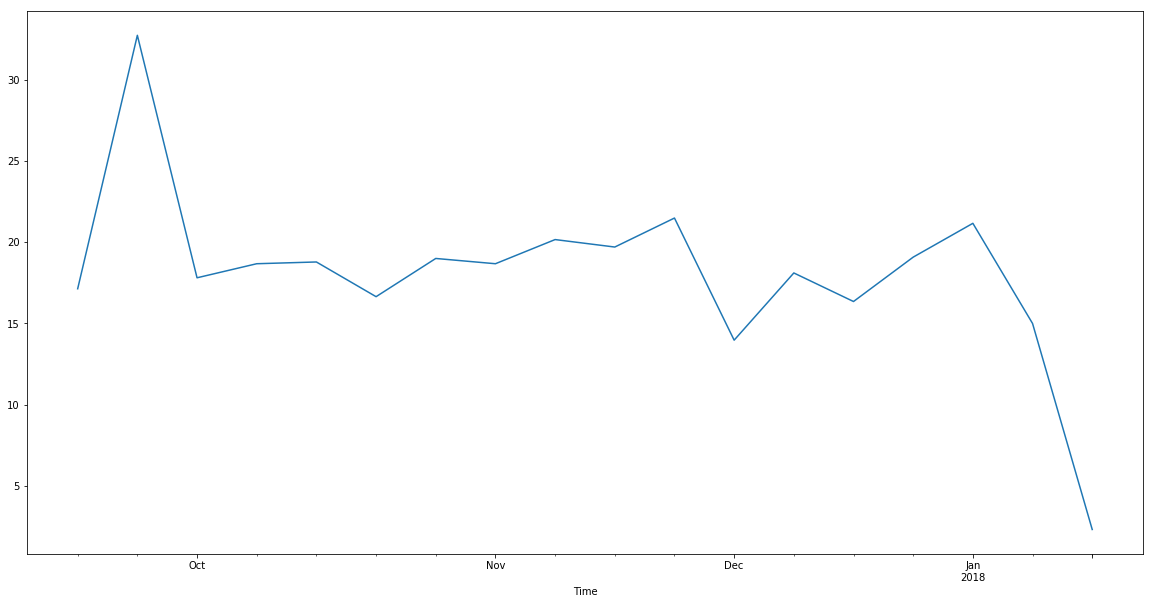

In [28]:
WeeklySummary =  getWeeklySummary()    
# print( WeeklySummary.head(20) )
WeeklySummary.mean().transpose().plot(figsize=(20,10))

# **`Plot daily avarage click count`**

**Generate daily based view sum:**

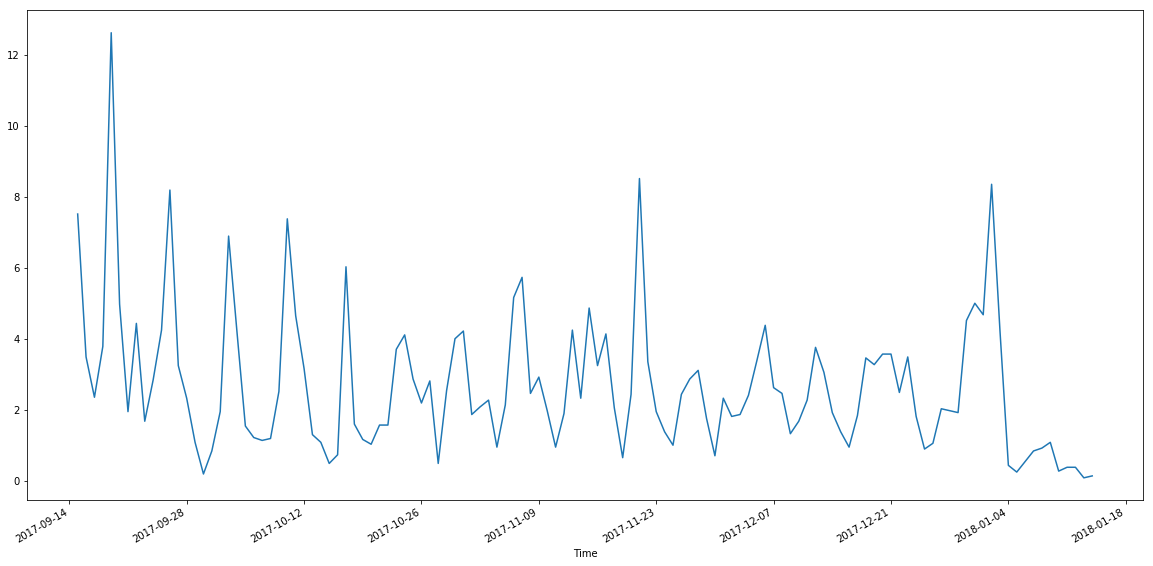

In [29]:
DailySummary = getDailySummary()
# print( DailySummary.head(50) )
DailySummary.mean().transpose().plot(figsize=(20,10))

# **Join Activity and Grades for further analysis **

In [30]:
Final = Grades.merge(TermSummary, how='left', on=StdCol)
Final = Final.merge(SA, how='left', on=StdCol)
Final = Final.merge(ActiveDaysCount, how='left', on=StdCol)
Final = Final.merge(LInactivityPeriod, how='left', on=StdCol)
Final = Final.merge(AccessDuration, how='left', on=StdCol)
Final = Final.merge(StudentResourceView, how='left', on=StdCol)
Final = Final.merge(WeeklyConsistency, how='left', on=StdCol)



# Final.sort_values(FGradeCol,ascending=False)

#Grades

Final._get_numeric_data()


,Paper Week7,Paper Week10,Self evaluation Week10,Presentation Week 12,Practical Week 15,Course total (Real),lms_Count_File,lms_Count_Folder,lms_Count_Forum,lms_Count_Page,...,lms_Count_URL,Click,lms_Assignment1_delay,lms_Assignment2_delay,lms_Assignment3_delay,lms_ActiveDaysCount,lms_LInactivityPeriod,lms_AccessDuration,lms_RescourceViewCount,lms_ActiveWeekCount
0,25.5,29.0,2.0,4.7,15.4,76.6,68.0,17.0,0.0,11.0,...,7.0,3.0,0.0,0.0,0.0,49,10965.0,107,43,16
1,8.0,9.0,1.3,2.8,2.0,23.0,94.0,6.0,0.0,3.0,...,2.0,3.0,16.0,3.0,0.0,30,28288.0,117,38,15
2,9.0,12.0,2.0,3.5,13.6,40.1,98.0,13.0,0.0,30.0,...,14.0,3.0,-1.0,12.0,0.0,54,10068.0,111,73,17
3,23.0,27.0,5.0,4.7,27.3,87.0,57.0,16.0,0.0,8.0,...,3.0,3.0,0.0,2.0,0.0,28,17901.0,114,50,15
4,24.0,28.0,5.0,4.3,20.4,81.7,21.0,4.0,1.0,3.0,...,1.0,2.0,27.0,27.0,0.0,36,20056.0,116,20,17
5,21.0,24.0,4.5,4.7,26.9,81.1,60.0,16.0,0.0,36.0,...,6.0,3.0,-7.0,-7.0,-19.0,46,17712.0,121,49,17
6,0.0,0.0,0.0,0.0,0.0,0.0,46.0,11.0,0.0,2.0,...,6.0,NaN,NaN,NaN,NaN,10,30207.0,41,27,5
7,26.0,27.0,4.8,4.4,28.6,90.8,179.0,20.0,1.0,39.0,...,21.0,3.0,-5.0,-1.0,-1.0,62,15864.0,118,103,18
8,23.5,22.0,4.0,4.4,14.0,67.9,154.0,54.0,0.0,79.0,...,34.0,3.0,-11.0,0.0,-2.0,64,8139.0,121,106,18
9,23.0,19.5,4.3,3.9,24.3,74.9,182.0,23.0,0.0,49.0,...,21.0,3.0,-8.0,-2.0,-2.0,72,10077.0,120,85,18


# Missing Data

In [31]:
#Original data length
len(Final)

37

In [32]:
# How many rows with missing data 
sum(Final.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

5

In [33]:
# Show Rows with missing data ("for simplicity only")
null_data = Final[Final.isnull().any(axis=1)]
null_data

,User full name,Paper Week7,Paper Week10,Self evaluation Week10,Presentation Week 12,Practical Week 15,Course total (Real),Grade,lms_Count_File,lms_Count_Folder,...,lms_Count_URL,Click,lms_Assignment1_delay,lms_Assignment2_delay,lms_Assignment3_delay,lms_ActiveDaysCount,lms_LInactivityPeriod,lms_AccessDuration,lms_RescourceViewCount,lms_ActiveWeekCount
6,B61,0.0,0.0,0.0,0.0,0.0,0.0,F,46.0,11.0,...,6.0,NaN,NaN,NaN,NaN,10,30207.0,41,27,5
24,B32,0.0,0.0,0.0,0.0,0.0,0.0,F,9.0,3.0,...,1.0,NaN,NaN,NaN,NaN,11,18940.0,55,15,8
29,B93,0.0,0.0,0.0,0.0,0.0,0.0,F,52.0,3.0,...,11.0,NaN,NaN,NaN,NaN,23,29715.0,88,24,10
31,B31,0.0,0.0,0.0,4.7,0.0,4.7,F,84.0,12.0,...,22.0,NaN,NaN,NaN,NaN,37,15752.0,109,55,16
32,B11,0.0,0.0,0.0,0.0,0.0,0.0,F,65.0,14.0,...,17.0,NaN,NaN,NaN,NaN,18,60475.0,79,46,8


In [34]:
# Drop all rows with missing values ()
Final = Final.dropna()

In [35]:
len(Final)

32

**Check Correlation:**

In [37]:
xx = pd.DataFrame( Final._get_numeric_data().corr(method='spearman')) 

filter_col = [col for col in xx if col.startswith('lms_')]

xx = xx[filter_col]

cm = sns.light_palette("green", as_cmap=True)

xx.loc[xx.index == FGradeCol].style.format("{:.3}").background_gradient(cmap=cm, axis=1)

,lms_Count_File,lms_Count_Folder,lms_Count_Forum,lms_Count_Page,lms_Count_System,lms_Count_URL,lms_Assignment1_delay,lms_Assignment2_delay,lms_Assignment3_delay,lms_ActiveDaysCount,lms_LInactivityPeriod,lms_AccessDuration,lms_RescourceViewCount,lms_ActiveWeekCount
Course total (Real),-0.16,-0.0239,0.14,-0.0636,-0.0518,-0.204,-0.165,-0.0538,-0.454,-0.0502,0.228,0.298,0.239,0.0502


**Plot pairwise relations between overall grade and views&marks columns**

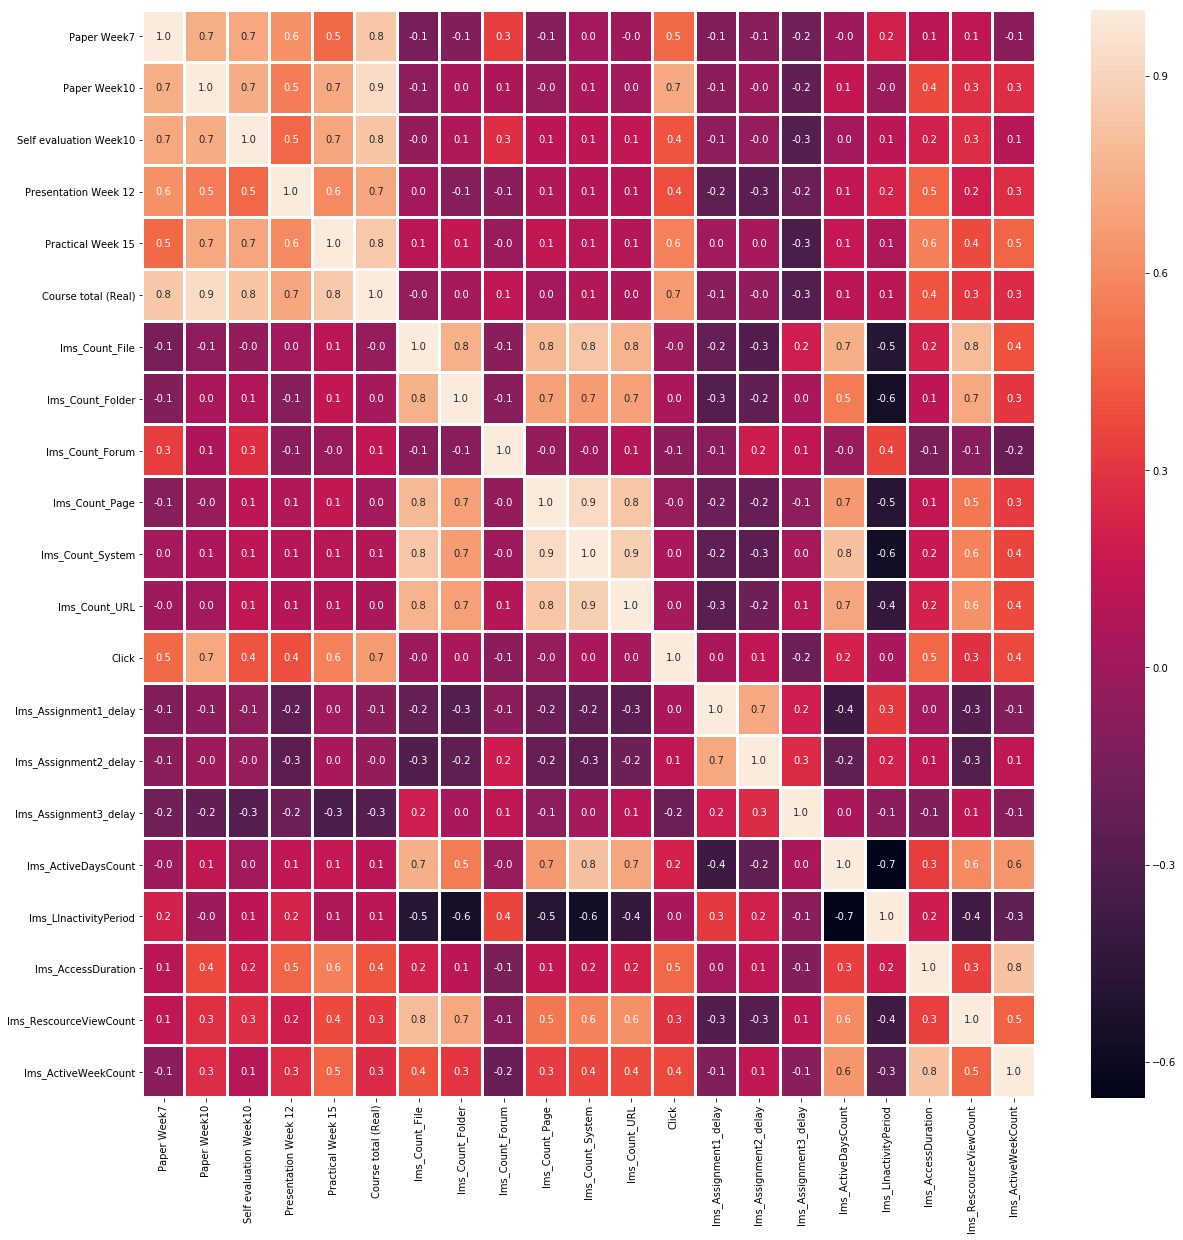

In [38]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(Final._get_numeric_data().corr(), annot=True, linewidths=2, fmt= '.1f')
plt.show() # eliminates the black-white line

# Grouping

Avarage activity by group based on overall grade A is hiegest.

In [39]:
Final['Group'] = ''
Final[ "Group Name"]= ''
Final = Final.copy()

for item, row in Final.iterrows(): 
  if Final.loc[item, FGradeCol] >= 75 :
     Final.loc[item, "Group"]= 1
     Final.loc[item, "Group Name"]= 'A'
  elif Final.loc[item, FGradeCol] >= 40 :
     Final.loc[item, "Group"]= 2
     Final.loc[item, "Group Name"]= 'B'
  else:
     Final.loc[item, "Group"]= 3
     Final.loc[item, "Group Name"]= 'C'
      
#Final

In [40]:
x = (Final.groupby(['Group Name'], as_index=False).mean())
# x['lms_all']= x['lms_C_File']+x['lms_C_Folder']+x['lms_C_Forum']+x['lms_C_URL']+x['lms_C_System']
# x
# pd.set_option('display.max_columns', 500)
x['lms_all'] = x[[col for col in Final if col.startswith('lms_Count_')]].sum(axis=1)

x.set_index("Group Name",inplace=True)
x

,Paper Week7,Paper Week10,Self evaluation Week10,Presentation Week 12,Practical Week 15,Course total (Real),lms_Count_File,lms_Count_Folder,lms_Count_Forum,lms_Count_Page,...,lms_Assignment1_delay,lms_Assignment2_delay,lms_Assignment3_delay,lms_ActiveDaysCount,lms_LInactivityPeriod,lms_AccessDuration,lms_RescourceViewCount,lms_ActiveWeekCount,Group,lms_all
Group Name,,,,,,,,,,,,,,,,,,,,,
A,23.915385,24.507692,4.392308,4.384615,23.361538,80.538462,119.923077,20.846154,0.615385,38.230769,...,1.461538,2.923077,-2.769231,46.307692,16497.153846,113.461538,73.923077,16.307692,1.0,345.230769
B,15.950000,17.850000,3.300000,3.680000,19.090000,60.040000,126.200000,22.700000,0.100000,38.300000,...,5.800000,6.800000,-0.600000,53.600000,12928.400000,116.000000,77.800000,17.200000,2.0,357.700000
C,9.166667,7.722222,1.744444,1.722222,6.333333,26.666667,142.444444,22.666667,0.444444,42.555556,...,1.000000,2.333333,-0.111111,47.000000,14636.777778,104.888889,59.888889,15.666667,3.0,374.111111


**Student Moodle Resources View by Student Group**


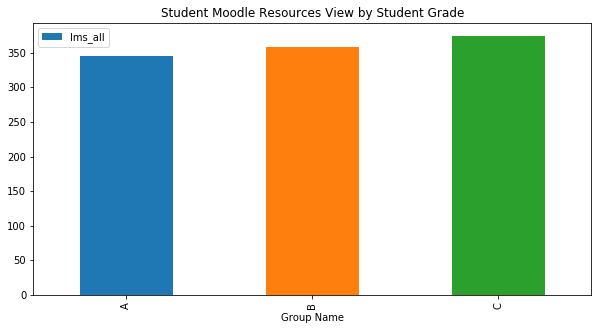

In [41]:
x.plot.bar( y='lms_all' ,figsize=(10,5), title='Student Moodle Resources View by Student Grade'  )


**Student Moodle Course Access Rate by Student Grade**

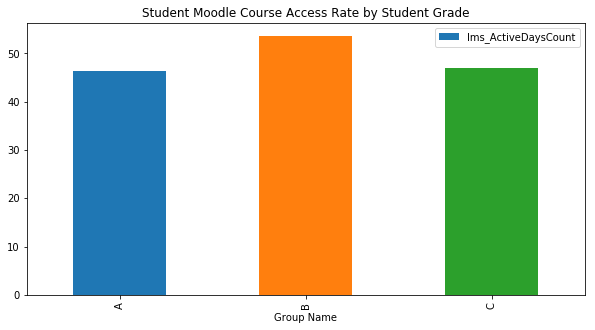

In [42]:
x.plot.bar(y='lms_ActiveDaysCount' ,figsize=(10,5), title='Student Moodle Course Access Rate by Student Grade'  )


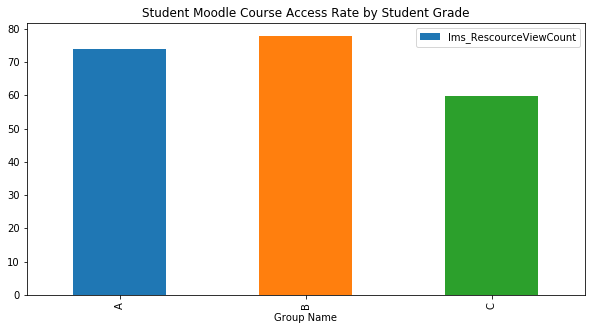

In [43]:
x.plot.bar(y='lms_RescourceViewCount' ,figsize=(10,5), title='Student Moodle Course Access Rate by Student Grade'  )


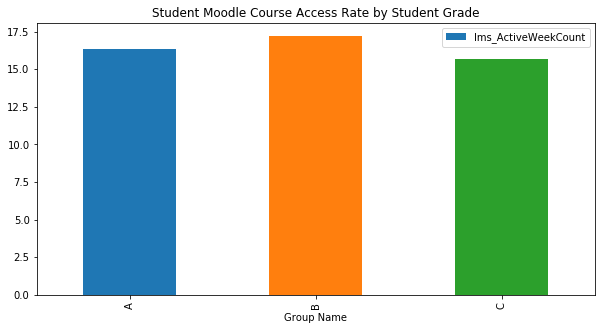

In [44]:
x.plot.bar(y='lms_ActiveWeekCount' ,figsize=(10,5), title='Student Moodle Course Access Rate by Student Grade'  )


In [45]:
#Final[['Group',FGradeCol, 'ExamGrade','CAgrade',	'File',	'Folder',	'Page',	'System','URL','Quiz','diff1','AF']].corr(method='spearman').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

#Final[Final.columns.difference(['Grade'])].corr(method='spearman').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


In [46]:
# (Final.groupby(['Group'], as_index=False).mean()).plot(x='Group','all')

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()


# for key, grp in Final.groupby(['Group']):
#    ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)

# plt.legend(loc='best')
# plt.show()

# Decision Tree Analysis

In [147]:
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import RepeatedKFold 


In [148]:

#X = pd.DataFrame(Final[[	'CAgrade', 'ExamGrade', 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff']])
#XX = pd.DataFrame(Final[[	 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff1','AF']])

# All clumns incuding grades
# filter_col = Final._get_numeric_data().columns.difference(['Grade','Group',FGradeCol])
# X = pd.DataFrame(Final[filter_col])


# only LMS data
filter_col = [col for col in Final if col.startswith('lms_') and not col.startswith('lms_d')]
X = Final[filter_col]


Y = Final['Group']

X.fillna('-20', inplace=True)
filter_col

['lms_Count_File',
 'lms_Count_Folder',
 'lms_Count_Forum',
 'lms_Count_Page',
 'lms_Count_System',
 'lms_Count_URL',
 'lms_Assignment1_delay',
 'lms_Assignment2_delay',
 'lms_Assignment3_delay',
 'lms_ActiveDaysCount',
 'lms_LInactivityPeriod',
 'lms_AccessDuration',
 'lms_RescourceViewCount',
 'lms_ActiveWeekCount']

In [149]:
# X.reset_index(drop=True)

In [150]:
# kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

# for train_index, test_index in kf.split(X):
#      print("Train:", train_index, "Validation:",test_index)
#      X_train, X_test = X[train_index], X[test_index] 
#      y_train, y_test = y[train_index], y[test_index]

In [151]:
# from sklearn.model_selection import KFold 
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# kf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=None) 

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = X[train_index], X[test_index] 
#       y_train, y_test = Y[train_index], Y[test_index]
#       break;

In [152]:
x.dtypes

Paper Week7               float64
Paper Week10              float64
Self evaluation Week10    float64
Presentation Week 12      float64
Practical Week 15         float64
Course total (Real)       float64
lms_Count_File            float64
lms_Count_Folder          float64
lms_Count_Forum           float64
lms_Count_Page            float64
lms_Count_System          float64
lms_Count_URL             float64
Click                     float64
lms_Assignment1_delay     float64
lms_Assignment2_delay     float64
lms_Assignment3_delay     float64
lms_ActiveDaysCount       float64
lms_LInactivityPeriod     float64
lms_AccessDuration        float64
lms_RescourceViewCount    float64
lms_ActiveWeekCount       float64
Group                     float64
lms_all                   float64
dtype: object

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.6, random_state = 100)

In [154]:
#clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)

clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, Y_train)


#classifier = DecisionTreeClassifier()  
#classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

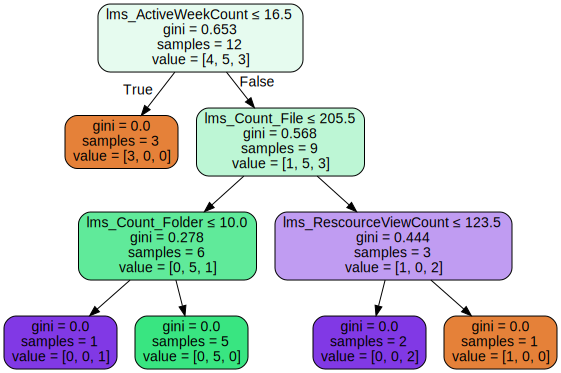

In [155]:
feature_names = list(X.columns)
#class_names   = ["C","B","A"]

#class_names = class_names,

dot_data = tree.export_graphviz(clf_gini, out_file=None,                         
                         feature_names=feature_names,  
                         
                         filled=True, rounded=True,  
                         special_characters=True)  


graph = graphviz.Source(dot_data)  
graph 

#class_names

In [156]:
Y_pred = clf_gini.predict(X_test)  


In [157]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred))  


[[5 2 2]
 [1 3 1]
 [4 1 1]]
             precision    recall  f1-score   support

          1       0.50      0.56      0.53         9
          2       0.50      0.60      0.55         5
          3       0.25      0.17      0.20         6

avg / total       0.42      0.45      0.43        20



In [158]:
print ("Accuracy is ", accuracy_score(Y_test,Y_pred)*100)

Accuracy is  45.0


In [159]:
#cccc = pd.DataFrame({'Predicted':y_pred,'Actual':Y_test })  
#cccc


# Regression Tree

In [160]:
#X = pd.DataFrame(Final[[	'CAgrade', 'ExamGrade', 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff']])
#XX = pd.DataFrame(Final[[	 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff1','AF']])

filter_col = [col for col in Final if col.startswith('lms_') and not col.startswith('lms_di')]
X = pd.DataFrame(Final[filter_col])

Y = pd.DataFrame(Final[FGradeCol])

X.fillna('-20', inplace=True)
filter_col

['lms_Count_File',
 'lms_Count_Folder',
 'lms_Count_Forum',
 'lms_Count_Page',
 'lms_Count_System',
 'lms_Count_URL',
 'lms_Assignment1_delay',
 'lms_Assignment2_delay',
 'lms_Assignment3_delay',
 'lms_ActiveDaysCount',
 'lms_LInactivityPeriod',
 'lms_AccessDuration',
 'lms_RescourceViewCount',
 'lms_ActiveWeekCount']

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.6, random_state = 100)

In [162]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [163]:
Y_pred = regressor.predict(X_test)  
Y_pred

array([50. , 87. ,  0. , 87. , 77.3, 50. , 74.9, 40.1, 77.3, 40.1, 50. ,
       84.5, 50. , 40.1,  0. , 50. ,  0. , 87. , 67.9,  0. ])

In [164]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) 

Mean Absolute Error: 24.654999999999998
Mean Squared Error: 1066.7665
Root Mean Squared Error: 32.661391580886445


# Regression

In [165]:
#XX = pd.DataFrame(Final[[	'CAgrade', 'ExamGrade', 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff1']])

filter_col = [col for col in Final if col.startswith('lms_') and not col.startswith('lms_dif') ]
X = pd.DataFrame(Final[filter_col])


Y = pd.DataFrame(Final[FGradeCol])

# X.fillna('-20', inplace=True)


In [166]:
import statsmodels.api as sm


#X = sm.add_constant(X) 

model = sm.OLS(Y, X.astype(float)).fit()

print (model.summary())

                             OLS Regression Results                            
Dep. Variable:     Course total (Real)   R-squared:                       0.944
Model:                             OLS   Adj. R-squared:                  0.901
Method:                  Least Squares   F-statistic:                     21.79
Date:                 Thu, 21 Mar 2019   Prob (F-statistic):           1.90e-08
Time:                         10:00:44   Log-Likelihood:                -132.11
No. Observations:                   32   AIC:                             292.2
Df Residuals:                       18   BIC:                             312.7
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
lms_Count_File    